Author: ELLIOT DAHL

The Data Incubator Project Proposal

## What makes a healthy county? 

I want to explore how nation-wide county health is related to parameters we as a society are in some 
sense control of such as food, access to exercise, education, clinical care, insurance, social network 
and the presence of [Just](https://justcapital.com/2017-rankings/) companies. 

County Health Rankings & Roadmaps in a collaboration between the Robert Wood Johnson Foundation and the University of Wisconsin Population Health Institute gathered data from various sources to try to rank counties in how healthy they are. The data can be found [here](http://www.countyhealthrankings.org/explore-health-rankings/rankings-data). 

The data contains Health Outcomes which is calculated accordingly:
- Length of life (50%)
- Quality of life (50%)

The data also contains Health Factors which is calculated as such: 
- Health behaviours (30%)
- Clinical care (20%)
- Social and Economic Environment (40%)

Health behaviours, Clinical care, Social and Economic Environment is itself calculated from various parameters such as obesity, physical inactivity, primary care physician ratio, high school graduates etc. 

Ideally we would want to be able to say how the health is based on good health factors we have. We want a 1-1 relationship between these. As I show below, it is not. Health Factors is based on human evaulation of how each parameter should play into the Health Outcomes. I intend to find a better relationship using ML classifiers. 

Below is a first attempt at a very simple logistic classifier. 

I also want to incorporate how [Just](https://justcapital.com/) companies are present in the county. 

Moreover, how does the parameters we do not control play into county health, such as political views [data](https://github.com/tonmcg/County_Level_Election_Results_12-16), vicinity to nature, weather etc. I intend to find data on these various aspect and use them as well.  

The following notebook is intended to explore nation wide health to a small extent and will be a lot more thorough in time for the Data incubator bootcamp. 

In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load Data

In [252]:
df_comp = pd.read_excel('COMPANY_DATA.xlsx')
df_health = pd.read_excel('2017CountyHealthRankingsData.xls',sheetname='Outcomes & Factors Rankings',skiprows=1)
df_health_fact = pd.read_excel('2017CountyHealthRankingsData.xls',sheetname='Ranked Measure Data',skiprows=1)
df_pol = pd.read_csv('2016_US_County_Level_Presidential_Results.csv')

### Explore health data

In [253]:
df_health.head()

,FIPS,State,County,# of Ranked Counties,Rank,Quartile,Rank.1,Quartile.1
0,1001,Alabama,Autauga,67,8,1,3,1
1,1003,Alabama,Baldwin,67,2,1,4,1
2,1005,Alabama,Barbour,67,27,2,60,4
3,1007,Alabama,Bibb,67,48,3,37,3
4,1009,Alabama,Blount,67,11,1,21,2


In [254]:
df_health.tail()

,FIPS,State,County,# of Ranked Counties,Rank,Quartile,Rank.1,Quartile.1
3131,56037,Wyoming,Sweetwater,23,17,3,20,4
3132,56039,Wyoming,Teton,23,1,1,1,1
3133,56041,Wyoming,Uinta,23,21,4,17,3
3134,56043,Wyoming,Washakie,23,13,3,15,3
3135,56045,Wyoming,Weston,23,11,2,11,2


In [255]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3136 entries, 0 to 3135
Data columns (total 8 columns):
FIPS                    3136 non-null int64
State                   3136 non-null object
County                  3136 non-null object
# of Ranked Counties    3136 non-null int64
Rank                    3136 non-null object
Quartile                3136 non-null object
Rank.1                  3136 non-null object
Quartile.1              3136 non-null object
dtypes: int64(2), object(6)
memory usage: 196.1+ KB


Here is a [link](http://www.countyhealthrankings.org/explore-health-rankings/our-methods/calculating-scores-and-ranks) on the ranking

In [256]:
#Not interested in the quartile as of now
df_health = df_health.drop(['# of Ranked Counties','Quartile','Quartile.1'],axis=1)

In [257]:
df_health.head()

,FIPS,State,County,Rank,Rank.1
0,1001,Alabama,Autauga,8,3
1,1003,Alabama,Baldwin,2,4
2,1005,Alabama,Barbour,27,60
3,1007,Alabama,Bibb,48,37
4,1009,Alabama,Blount,11,21


In [258]:
df_health.columns = ['FIPS','State', 'County', 'Health outcome', 'Health factors']

In [259]:
df_health.head()

,FIPS,State,County,Health outcome,Health factors
0,1001,Alabama,Autauga,8,3
1,1003,Alabama,Baldwin,2,4
2,1005,Alabama,Barbour,27,60
3,1007,Alabama,Bibb,48,37
4,1009,Alabama,Blount,11,21


In [260]:
#Drop non avaliable county data
df_health = df_health[df_health['Health outcome']!='NR'];

### Explore rank health data

In [297]:
df_health_fact.head()

,FIPS,State,County,# Deaths,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,Quartile,% Fair/Poor,95% CI - Low.1,...,95% CI - High.20,Quartile.33,% Drive Alone - Black,% Drive Alone - Hispanic,% Drive Alone - White,# Workers who Drive Alone,% Long Commute - Drives Alone,95% CI - Low.21,95% CI - High.21,Quartile.34
0,1001,Alabama,Autauga,830.0,9158.2,8251.0,10065.3,1,17.878814,17.309716,...,89.272604,4,NaN,NaN,82.688642,21101,42.6,38.498437,46.701563,3
1,1003,Alabama,Baldwin,2573.0,7393.9,6947.3,7840.4,1,16.361973,15.930774,...,85.889448,2,84.812778,61.239620,85.255443,71535,37.7,35.278607,40.121393,3
2,1005,Alabama,Barbour,413.0,8573.1,7291.9,9854.3,1,25.020401,24.388756,...,85.631456,2,82.056719,NaN,NaN,7090,35.5,30.606183,40.393817,3
3,1007,Alabama,Bibb,407.0,11766.1,10033.8,13498.4,4,19.540231,18.909030,...,88.544332,2,NaN,NaN,88.356941,6778,46.5,39.207540,53.792460,4
4,1009,Alabama,Blount,906.0,9332.8,8429.8,10235.8,2,18.947608,18.348409,...,87.475791,2,NaN,73.117034,82.172461,18624,59.8,55.074426,64.525574,4


In [313]:
df_health_fact_use = df_health_fact[['FIPS','% Smokers','% Obese','Food Environment Index',
                                    '% Physically Inactive','% With Access','% Excessive Drinking',
                                    '% Alcohol-Impaired','Chlamydia Rate',
                                    'Teen Birth Rate','% Uninsured','PCP Ratio',
                                    'Dentist Ratio','MHP Ratio','Preventable Hosp. Rate',
                                    '% Receiving HbA1c','% Mammography','Graduation Rate',
                                    '% Some College','% Unemployed','% Children in Poverty',
                                    'Income Ratio', '% Single-Parent Households','Association Rate',
                                    'Violent Crime Rate','Injury Death Rate','Average Daily PM2.5',
                                    'Presence of violation','% Severe Housing Problems','% Drive Alone',
                                    '% Long Commute - Drives Alone']]

In [314]:
df_health_fact_use.head()

,FIPS,% Smokers,% Obese,Food Environment Index,% Physically Inactive,% With Access,% Excessive Drinking,% Alcohol-Impaired,Chlamydia Rate,Teen Birth Rate,...,Income Ratio,% Single-Parent Households,Association Rate,Violent Crime Rate,Injury Death Rate,Average Daily PM2.5,Presence of violation,% Severe Housing Problems,% Drive Alone,% Long Commute - Drives Alone
0,1001,17.380239,34.1,6.9,28.6,70.821499,14.954122,32.653061,398.2,32.418778,...,4.313549,25.165611,13.719650,265.699747,76.236862,10.8,No,14.723468,87.483416,42.6
1,1003,17.937120,27.4,7.5,22.3,72.168546,15.378031,34.228188,341.1,38.019408,...,4.524768,26.783655,11.543593,216.773078,71.452920,9.6,Yes,14.702872,84.652798,37.7
2,1005,22.776689,44.4,4.9,31.8,45.267145,11.923450,38.461538,613.1,59.021292,...,5.562510,56.455563,8.182393,328.659071,67.521444,10.1,Yes,16.195652,83.766541,35.5
3,1007,19.850766,40.3,7.3,33.9,32.838752,14.309652,33.333333,444.2,47.497880,...,4.272871,29.569672,10.219497,147.290900,81.441875,10.5,No,13.681241,83.186058,46.5
4,1009,21.037382,34.6,8.3,28.0,25.508531,13.902888,20.408163,124.4,43.230404,...,4.037139,27.381214,8.489406,211.598836,96.617688,11.3,No,11.534818,84.866712,59.8


In [310]:
df_health_fact_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3136 entries, 0 to 3135
Data columns (total 30 columns):
% Smokers                        3136 non-null float64
% Obese                          3136 non-null float64
Food Environment Index           3136 non-null float64
% Physically Inactive            3136 non-null float64
% With Access                    3063 non-null float64
% Excessive Drinking             3136 non-null float64
% Alcohol-Impaired               3118 non-null float64
Chlamydia Rate                   2986 non-null float64
Teen Birth Rate                  3029 non-null float64
% Uninsured                      3135 non-null float64
PCP Ratio                        3004 non-null object
Dentist Ratio                    3057 non-null object
MHP Ratio                        2849 non-null object
Preventable Hosp. Rate           3048 non-null float64
% Receiving HbA1c                3095 non-null float64
% Mammography                    3037 non-null float64
Graduation Rate 

### Explore just company data

In [261]:
df_comp.head()

,state_county_fips,id,weight1,col1,col3,col4,col5,col6,col7,col8,...,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28
0,1001,0,22,15.58,1.82,12.47,20.199,83770.04,21.25,25.49,...,1.17,0.83,20.199,23534.09,0.61,0.61,9.243,12810.16,0.10,0.10
1,1001,1,125,15.58,13.54,13.57,111.467,510522.29,22.88,25.76,...,1.05,0.95,44.548,51904.70,0.23,0.22,59.035,62194.05,0.35,0.24
2,1001,2,70,15.58,0.00,10.55,66.699,335401.27,11.15,13.45,...,0.58,0.56,24.840,28941.57,0.26,0.15,32.917,45623.42,0.46,0.29
3,1001,3,46,15.58,6.05,9.77,39.944,218625.25,16.18,20.25,...,1.17,0.92,34.205,39854.46,0.65,0.53,11.572,16038.28,0.31,0.15
4,1001,4,7,15.58,0.98,9.72,6.027,20930.97,11.00,15.94,...,1.40,0.83,0.385,448.52,0.31,0.16,3.089,4281.74,0.18,0.14


In [262]:
#sum on FIPS (County code)
df_comp_count = df_comp.groupby('state_county_fips').sum()
df_comp_count.head()

,id,weight1,col1,col3,col4,col5,col6,col7,col8,col9,...,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28
state_county_fips,,,,,,,,,,,,,,,,,,,,,
1001,914,1395,529.72,100.01,389.71,1287.126,6037284.92,496.38,615.60,1287.126,...,34.25,24.39,615.206,716794.36,10.42,8.59,536.527,705735.07,11.42,7.68
1003,3006,10878,1159.50,730.76,893.48,10065.034,45021645.54,1044.98,1317.28,10061.949,...,71.82,49.29,4669.593,5440713.06,19.71,15.64,4101.577,5373149.87,21.80,14.48
1005,683,1261,406.62,74.50,296.72,1179.943,5437307.65,376.09,468.60,1179.688,...,26.02,18.14,584.065,680513.00,7.81,6.77,435.106,594984.27,9.00,5.69
1007,278,582,186.12,32.84,134.06,543.050,2573458.70,175.79,217.27,543.049,...,11.63,8.04,268.289,312590.13,3.02,2.67,178.825,245498.47,3.88,2.49
1009,597,1023,341.22,62.94,249.59,955.548,4395281.78,304.39,381.75,955.548,...,19.89,13.84,470.162,547800.10,6.36,5.39,346.870,469952.96,7.92,5.18


Only interested in the weight1-column which according to this [link](https://justcapital.com/data-science/) is correlated to Just  company presence in that county

In [263]:
df_comp_count = df_comp_count.reset_index();
df_comp_count = df_comp_count[['state_county_fips','weight1']]

In [264]:
df_comp_count.head()

,state_county_fips,weight1
0,1001,1395
1,1003,10878
2,1005,1261
3,1007,582
4,1009,1023


In [265]:
df_comp_count.columns = ['FIPS','Just']

In [266]:
df_comp_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004 entries, 0 to 3003
Data columns (total 2 columns):
FIPS    3004 non-null int64
Just    3004 non-null int64
dtypes: int64(2)
memory usage: 47.0 KB


### Explore political county data

In [267]:
df_pol.head()

,Unnamed: 0,votes_dem,votes_gop,total_votes,per_dem,per_gop,diff,per_point_diff,state_abbr,county_name,combined_fips
0,0,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2013
1,1,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2016
2,2,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2020
3,3,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2050
4,4,93003.0,130413.0,246588.0,0.377159,0.52887,"37,410",15.17%,AK,Alaska,2060


I will only look at percent democrats and republicans in each county for now

In [268]:
df_pol = df_pol[['per_dem','per_gop','combined_fips']]

In [269]:
df_pol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141 entries, 0 to 3140
Data columns (total 3 columns):
per_dem          3141 non-null float64
per_gop          3141 non-null float64
combined_fips    3141 non-null int64
dtypes: float64(2), int64(1)
memory usage: 73.7 KB


In [270]:
df_pol.describe()

,per_dem,per_gop,combined_fips
count,3141.000000,3141.000000,3141.000000
mean,0.317637,0.635144,30388.584527
std,0.152983,0.156130,15162.375610
min,0.031447,0.041221,1001.000000
25%,0.205370,0.545760,18179.000000
50%,0.286400,0.665353,29177.000000
75%,0.398241,0.750265,45081.000000
max,0.928466,0.952727,56045.000000


In [271]:
def pol_view(per_dem,per_gop):
    if per_dem>per_gop:
        return 'Dem'
    else:
        return 'Rep'
    
df_pol['Won'] = df_pol.apply(lambda row: pol_view(row['per_dem'],row['per_gop']), axis=1)

In [272]:
df_pol.head()

,per_dem,per_gop,combined_fips,Won
0,0.377159,0.52887,2013,Rep
1,0.377159,0.52887,2016,Rep
2,0.377159,0.52887,2020,Rep
3,0.377159,0.52887,2050,Rep
4,0.377159,0.52887,2060,Rep


In [273]:
df_pol.tail()

,per_dem,per_gop,combined_fips,Won
3136,0.194046,0.729428,56037,Rep
3137,0.600608,0.321945,56039,Dem
3138,0.149261,0.764187,56041,Rep
3139,0.143203,0.783580,56043,Rep
3140,0.088182,0.869226,56045,Rep


In [274]:
df_pol.rename(columns={'combined_fips':'FIPS'}, inplace=True)

In [275]:
df_pol.columns

Index(['per_dem', 'per_gop', 'FIPS', 'Won'], dtype='object')

In [276]:
df_pol.groupby('Won').count()

,per_dem,per_gop,FIPS
Won,,,
Dem,487,487,487
Rep,2654,2654,2654


### Merge the data sets

In [316]:
df_two = df_health.merge(df_comp_count, how='left', on='FIPS')

In [317]:
df_three = df_two.merge(df_pol, how='left', on='FIPS')

In [318]:
df = df_three.merge(df_health_fact_use, how='left', on='FIPS')

In [319]:
df.head()

,FIPS,State,County,Health outcome,Health factors,Just,per_dem,per_gop,Won,% Smokers,...,Income Ratio,% Single-Parent Households,Association Rate,Violent Crime Rate,Injury Death Rate,Average Daily PM2.5,Presence of violation,% Severe Housing Problems,% Drive Alone,% Long Commute - Drives Alone
0,1001,Alabama,Autauga,8,3,1395.0,0.239569,0.734358,Rep,17.380239,...,4.313549,25.165611,13.719650,265.699747,76.236862,10.8,No,14.723468,87.483416,42.6
1,1003,Alabama,Baldwin,2,4,10878.0,0.195653,0.773515,Rep,17.937120,...,4.524768,26.783655,11.543593,216.773078,71.452920,9.6,Yes,14.702872,84.652798,37.7
2,1005,Alabama,Barbour,27,60,1261.0,0.466603,0.522714,Rep,22.776689,...,5.562510,56.455563,8.182393,328.659071,67.521444,10.1,Yes,16.195652,83.766541,35.5
3,1007,Alabama,Bibb,48,37,582.0,0.214220,0.769662,Rep,19.850766,...,4.272871,29.569672,10.219497,147.290900,81.441875,10.5,No,13.681241,83.186058,46.5
4,1009,Alabama,Blount,11,21,1023.0,0.084699,0.898519,Rep,21.037382,...,4.037139,27.381214,8.489406,211.598836,96.617688,11.3,No,11.534818,84.866712,59.8


In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3071 entries, 0 to 3070
Data columns (total 39 columns):
FIPS                             3071 non-null int64
State                            3071 non-null object
County                           3071 non-null object
Health outcome                   3071 non-null object
Health factors                   3071 non-null object
Just                             2991 non-null float64
per_dem                          3071 non-null float64
per_gop                          3071 non-null float64
Won                              3071 non-null object
% Smokers                        3071 non-null float64
% Obese                          3071 non-null float64
Food Environment Index           3071 non-null float64
% Physically Inactive            3071 non-null float64
% With Access                    3020 non-null float64
% Excessive Drinking             3071 non-null float64
% Alcohol-Impaired               3061 non-null float64
Chlamydia Rate      

- Better Health outcome and Health factors has lower values
- Better Just presence in county has larger values

In [280]:
df.head()

,FIPS,State,County,Health outcome,Health factors,Just,per_dem,per_gop,Won
0,1001,Alabama,Autauga,8,3,1395.0,0.239569,0.734358,Rep
1,1003,Alabama,Baldwin,2,4,10878.0,0.195653,0.773515,Rep
2,1005,Alabama,Barbour,27,60,1261.0,0.466603,0.522714,Rep
3,1007,Alabama,Bibb,48,37,582.0,0.214220,0.769662,Rep
4,1009,Alabama,Blount,11,21,1023.0,0.084699,0.898519,Rep


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3071 entries, 0 to 3070
Data columns (total 9 columns):
FIPS              3071 non-null int64
State             3071 non-null object
County            3071 non-null object
Health outcome    3071 non-null object
Health factors    3071 non-null object
Just              2991 non-null float64
per_dem           3071 non-null float64
per_gop           3071 non-null float64
Won               3071 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 239.9+ KB


In [282]:
#comvert data into int
df['Health outcome'] = df['Health outcome'].astype(int);
df['Health factors'] = df['Health factors'].astype(int);

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3071 entries, 0 to 3070
Data columns (total 9 columns):
FIPS              3071 non-null int64
State             3071 non-null object
County            3071 non-null object
Health outcome    3071 non-null int64
Health factors    3071 non-null int64
Just              2991 non-null float64
per_dem           3071 non-null float64
per_gop           3071 non-null float64
Won               3071 non-null object
dtypes: float64(3), int64(3), object(3)
memory usage: 239.9+ KB


In [284]:
df.describe()

,FIPS,Health outcome,Health factors,Just,per_dem,per_gop
count,3071.000000,3071.000000,3071.000000,2991.000000,3071.000000,3071.000000
mean,30413.921524,47.787691,47.787691,3975.088599,0.320864,0.632096
std,15142.431920,41.759859,41.759859,10780.292311,0.151896,0.154920
min,1001.000000,1.000000,1.000000,7.000000,0.064995,0.041221
25%,18180.000000,17.000000,17.000000,243.000000,0.208183,0.544909
50%,29149.000000,38.000000,38.000000,1062.000000,0.287727,0.663363
75%,45076.000000,66.000000,66.000000,3048.000000,0.401869,0.747984
max,56045.000000,243.000000,243.000000,242729.000000,0.928466,0.917443


In [285]:
#Check the just NaN data
df[pd.isnull(df).any(axis=1)][:10]

,FIPS,State,County,Health outcome,Health factors,Just,per_dem,per_gop,Won
67,2016,Alaska,Aleutians West,6,12,NaN,0.377159,0.528870,Rep
78,2164,Alaska,Lake and Peninsula,15,16,NaN,0.377159,0.528870,Rep
81,2185,Alaska,North Slope,14,14,NaN,0.377159,0.528870,Rep
82,2188,Alaska,Northwest Arctic,17,18,NaN,0.377159,0.528870,Rep
84,2240,Alaska,Southeast Fairbanks,11,13,NaN,0.377159,0.528870,Rep
86,2290,Alaska,Yukon-Koyukuk,20,19,NaN,0.377159,0.528870,Rep
221,6091,California,Sierra,34,30,NaN,0.333149,0.580931,Rep
420,13101,Georgia,Echols,58,75,NaN,0.132766,0.856170,Rep
501,13265,Georgia,Taliaferro,143,147,NaN,0.607581,0.389075,Dem
522,13307,Georgia,Webster,124,104,NaN,0.422801,0.565530,Rep


In [286]:
#look for number of outliers
Q1 = df[['Health outcome','Health factors','Just']].quantile(0.25)
Q3 = df[['Health outcome','Health factors','Just']].quantile(0.75)
IQR = Q3 - Q1

In [287]:
((df[['Health outcome','Health factors','Just']] < (Q1 - 1.5 * IQR)) | 
 (df[['Health outcome','Health factors','Just']] > (Q3 + 1.5 * IQR))).sum()

Health outcome    124
Health factors    124
Just              388
dtype: int64

Seems like the Just data has a number of counties that have lots of Just company presence ==> outliers?

### Visually inspect the data

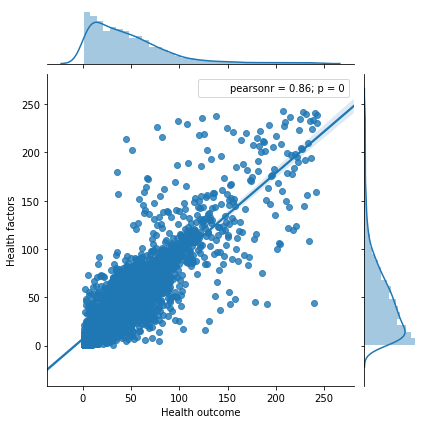

In [288]:
sns.jointplot('Health outcome', 'Health factors', data=df, kind='reg')

#### Obeservation
- There is a strong correlation as expected between the Health factors and the Health outcome

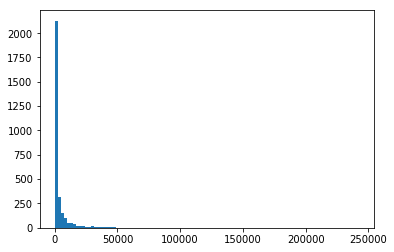

In [289]:
plt.hist(df['Just'].dropna(),bins=100);

In [290]:
df['Just'].describe()

count      2991.000000
mean       3975.088599
std       10780.292311
min           7.000000
25%         243.000000
50%        1062.000000
75%        3048.000000
max      242729.000000
Name: Just, dtype: float64

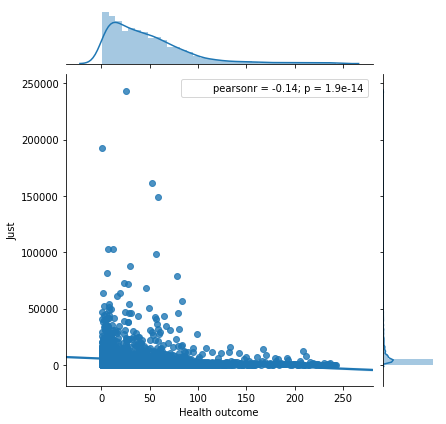

In [291]:
sns.jointplot('Health outcome', 'Just', data=df, kind='reg')

#### Obeservation
Appears as a few counties have a large presence of Just companies. In order explore this further I drop the Just values over 6000 to perhaps visaully see a better correlation. 

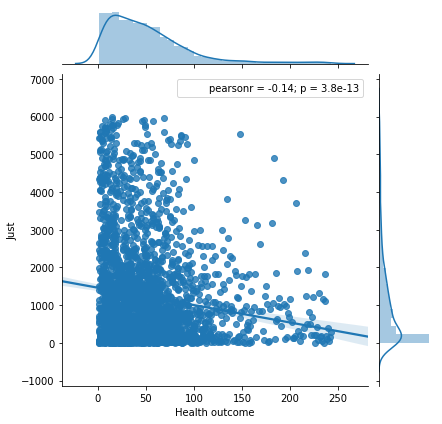

In [292]:
sns.jointplot(df[df['Just']<6000]['Health outcome'], df[df['Just']<6000]['Just'], kind='reg')

#### Obeservation
There is a slight correlation between how many Just companies there are and the health outcome in the specific county

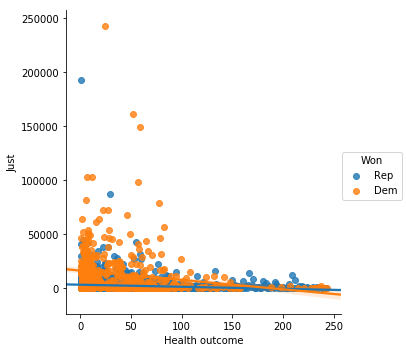

In [293]:
sns.lmplot(x='Health outcome', y='Just', hue='Won', data=df)

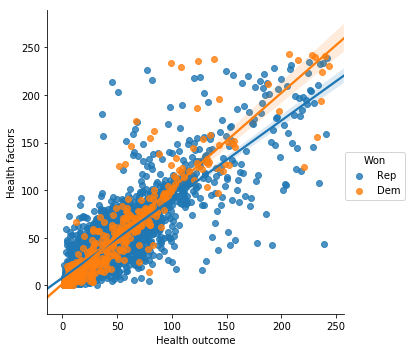

In [294]:
sns.lmplot(x='Health outcome', y='Health factors', hue='Won', data=df)

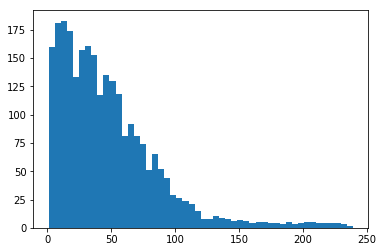

In [295]:
plt.hist(df[df['Won']=='Rep']['Health factors'],bins=50);

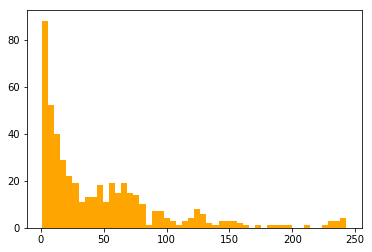

In [296]:
plt.hist(df[df['Won']=='Dem']['Health factors'],bins=50,color='orange');

## Bulding a logistic regression model

In [322]:
df.head()

,FIPS,State,County,Health outcome,Health factors,Just,per_dem,per_gop,Won,% Smokers,...,Income Ratio,% Single-Parent Households,Association Rate,Violent Crime Rate,Injury Death Rate,Average Daily PM2.5,Presence of violation,% Severe Housing Problems,% Drive Alone,% Long Commute - Drives Alone
0,1001,Alabama,Autauga,8,3,1395.0,0.239569,0.734358,Rep,17.380239,...,4.313549,25.165611,13.719650,265.699747,76.236862,10.8,No,14.723468,87.483416,42.6
1,1003,Alabama,Baldwin,2,4,10878.0,0.195653,0.773515,Rep,17.937120,...,4.524768,26.783655,11.543593,216.773078,71.452920,9.6,Yes,14.702872,84.652798,37.7
2,1005,Alabama,Barbour,27,60,1261.0,0.466603,0.522714,Rep,22.776689,...,5.562510,56.455563,8.182393,328.659071,67.521444,10.1,Yes,16.195652,83.766541,35.5
3,1007,Alabama,Bibb,48,37,582.0,0.214220,0.769662,Rep,19.850766,...,4.272871,29.569672,10.219497,147.290900,81.441875,10.5,No,13.681241,83.186058,46.5
4,1009,Alabama,Blount,11,21,1023.0,0.084699,0.898519,Rep,21.037382,...,4.037139,27.381214,8.489406,211.598836,96.617688,11.3,No,11.534818,84.866712,59.8


In [370]:
df_train = df.dropna() #Just for now, will see if I can do interpolataion later
X = df_train.drop(['FIPS','State','County','Health outcome','Health factors','Won',
                  'PCP Ratio','Dentist Ratio','MHP Ratio','Presence of violation'],axis=1)
#Later I will make some object type parameters integers or float to include in prediction
y = df_train['Health outcome'].astype(int)

## Train Test Split

In [371]:
from sklearn.model_selection import train_test_split

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training and Predicting

In [373]:
from sklearn.linear_model import LogisticRegression

In [374]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [380]:
Pred_train = logmodel.predict(X_train)

In [375]:
predictions = logmodel.predict(X_test)

## Evaluation

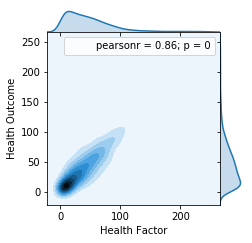

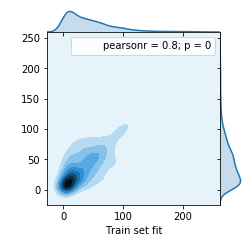

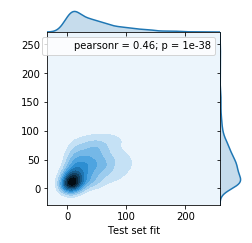

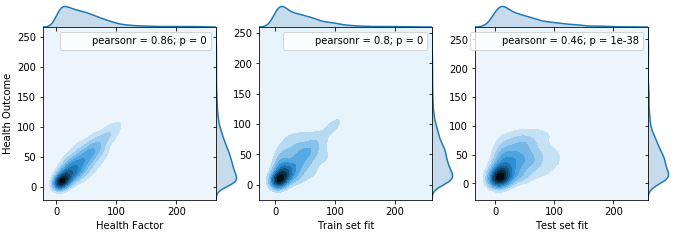

In [425]:
JG1 = sns.jointplot('Health factors','Health outcome', data=df, kind='kde');
JG2 = sns.jointplot(Pred_train, y_train, kind='kde');
JG3 = sns.jointplot(predictions,y_test,kind='kde')

#subplots migration
f = plt.figure();
for J in [JG1, JG2, JG3]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A);

#subplots size adjustment
f.axes[0].set_position([0.1, 0.1, 0.4,  0.4]);
f.axes[1].set_position([0.1, 0.50, 0.4,  0.05]);
f.axes[2].set_position([0.50, 0.1, 0.05, 0.4]);

f.axes[0].set_ylabel('Health Outcome')
f.axes[0].set_xlabel('Health Factor')

f.axes[3].set_position([0.60, 0.1, 0.4,  0.4]);
f.axes[4].set_position([0.60, 0.50, 0.4,  0.05]);
f.axes[5].set_position([1.0, 0.1, 0.05, 0.4]);

f.axes[3].set_ylabel(' ')
f.axes[3].set_xlabel('Train set fit')

f.axes[6].set_position([1.10, 0.1, 0.4,  0.4]);
f.axes[7].set_position([1.10, 0.50, 0.4,  0.05]);
f.axes[8].set_position([1.50, 0.1, 0.05, 0.4]);

f.axes[6].set_ylabel(' ')
f.axes[6].set_xlabel('Test set fit')

f.savefig('Compare_log_reg.pdf', bbox_inches='tight')


In [376]:
from sklearn.metrics import classification_report

In [377]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          1       0.10      0.14      0.11        14
          2       0.00      0.00      0.00        15
          3       0.06      0.08      0.06        13
          4       0.00      0.00      0.00         5
          5       0.00      0.00      0.00        16
          6       0.17      0.07      0.10        15
          7       0.00      0.00      0.00        13
          8       0.00      0.00      0.00        13
          9       0.00      0.00      0.00        11
         10       0.00      0.00      0.00        12
         11       0.00      0.00      0.00         9
         12       0.15      0.20      0.17        10
         13       0.00      0.00      0.00        13
         14       0.10      0.17      0.12        12
         15       0.00      0.00      0.00        10
         16       0.00      0.00      0.00        11
         17       0.00      0.00      0.00        10
         18       0.00      0.00      0.00   

/Users/elliotdahl/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/elliotdahl/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
